# Hotelling’s Linear City Model
Hotelling's Linear City Model, proposed by Harold Hotelling in 1929, is an economic model that describes the geografical location of firms in a city where everything is located on the same street. The model assumes that consumers are uniformly distributed along a linear market and have homogeneous preferences for a single product. Firms, on the other hand, aim to maximize their market share and profits.

In our model we wish to investigate Hotelling’s Linear City Model with Fixed Locations and Quadratic Production Costs, where there are two firms that sells the same good, and have exogeneous and fixed locations at $a=b=0$.
Each firm is defined by its location in the unit interval, where firm 1’s location is $a$, and firm 2’s location is $1-b$, and the common production cost is:

$C(Q_i (p_1,p_2 ))=c(Q_i (p_1,p_2 ))^2$

The consumers with different locations $x$, are uniformly distributed on the unit interval.
Where $\hat{x}$ is the location where the consumer is indifferent between buying from firm 1 and 2.

The utility of a consumer, located at $x$ if buying from firm 1 is:

$V_1 (x)=r-t(x-a)^2-p_1$

The utility from buying from firm 2 is:

$V_2 (x)=r-t(x-(1-b))^2-p_2$

Where $r$ is the consumers' reservation price, and $t(x-a)^2$ is the function that measures the transportation cost from buying from firm 1, and $t(x-(1-b))^2$ the function that measures the transportation cost from buying from firm 2.

Timing of the game:

* Firms simultaneously chooses their prices
* Each consumer observes the prices and then deciding which firm to buy from.



**We write up the code that illustrates this specific Linear City:**

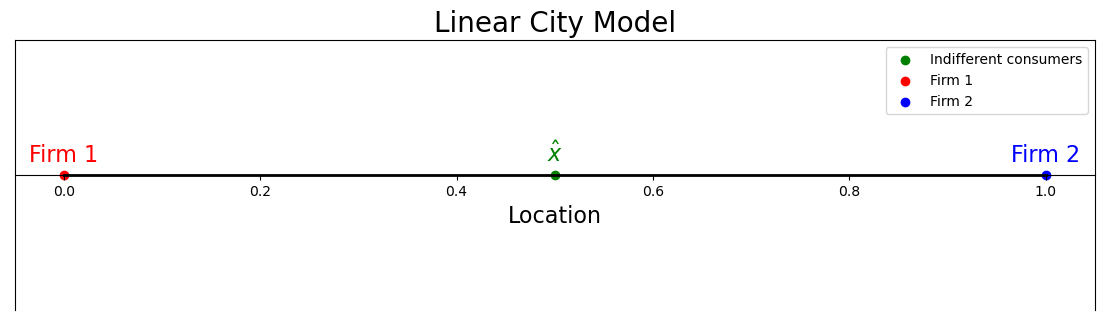

In [28]:
import matplotlib.pyplot as plt
#The linear city:
a = 0    # point for firm 1
b = 0.0  # point for firm 2
x = 0.5  # point where the consumer is indifferent between buying from the two firms

# Adjusting the figure size and padding
fig, ax = plt.subplots(figsize=(12, 3), gridspec_kw={'left': 0.1, 'right': 1.0, 'top': 1.0, 'bottom': 0.1})

# Plotting the linear city
x_vals = [0, a, x, 1 - b, 1]
y_vals = [0, 0, 0, 0, 0]  # Setting y-coordinates to zero for all points
ax.plot(x_vals, y_vals, color='black', linewidth=2)

# Marking the new point
ax.scatter(x, 0, color='green', label='Indifferent consumers')
ax.annotate(rf"$\hat{{x}}$", (x, 0), xytext=(x, 0.01), ha='center', color='green', fontsize=16)
ax.scatter(a, 0, color='red', label='Firm 1')
ax.annotate("Firm 1", (a, 0), xytext=(a, 0.01), ha='center', color='red', fontsize=16)
ax.scatter(1 - b, 0, color='blue', label='Firm 2')
ax.annotate("Firm 2", (1 - b, 0), xytext=(1 - b, 0.01), ha='center', color='blue', fontsize=16)

# Setting plot properties
ax.set_xlabel('Location', fontsize=16)
ax.set_title('Linear City Model', fontsize=20)
ax.legend()

# Removing the y-axis ticks and labels
ax.yaxis.set_ticks([])

# Adjusting the y-limits
ax.set_ylim(-0.1, 0.1)

# Moving the x-axis up
ax.spines['bottom'].set_position(('data', 0.0))

# Display the plot
plt.show()


**Now we wish to solve the equilibrium prices. Calculate the price marginal cost margin $(p-MC)$, and the firms’ equilibrium profits. And thereafre investigate what happens when $t→0$.**


We solve the game by backwards induction, where we start solving the consumers problem such that we find the demand functions for firm 1 and 2.

* Stage 2:

We find the case where the consumers are indifferent between buying from firm 1 and 2, which is at the location $\hat{x}$, where this is where $V_1=V_2$. We solve for $\hat{x}$:


In [26]:
from sympy import symbols, Eq, solve

# Define the variables and parameters
x = symbols('x')
r, t, p_1, p_2, = symbols('r t p_1 p_2')

# Define the utility functions
V_1 = r - t * x**2 - p_1
V_2 = r - t * (x - 1)**2 - p_2

# Set V_1 equal to V_2 and solve for x
equation = Eq(V_1, V_2)
solution = solve(equation, x)

x_hat = solution[0]  # Get the first solution

# Print the result
print(f"The location x_hat where consumers are indifferent is: {x_hat}")


The location x_hat where consumers are indifferent is: (-p_1 + p_2 + t)/(2*t)


In [27]:
print(f"Demand for firm 1 is hereby: {x_hat}")
print(f"Demand for firm 2 is hereby: {1-x_hat}")

Demand for firm 1 is hereby: (-p_1 + p_2 + t)/(2*t)
Demand for firm 2 is hereby: 1 - (-p_1 + p_2 + t)/(2*t)


* Stage 1:

We find the optimal price, and thereby the optimal profit

In [282]:
from sympy import symbols, simplify, solve

# Define the variables and parameters
p_1, p_2, r, t, c = symbols('p_1 p_2 r t c')

# Define the demand functions
demand_1 = x_hat
demand_2 = 1 - x_hat

# Calculate the revenue for firm 1 and firm 2
revenue_1 = demand_1 * p_1
revenue_2 = demand_2 * p_2

# Calculate the cost for firm 1 and firm 2
cost_1 = c * demand_1**2
cost_2 = c * demand_2**2

# Calculate the profit for firm 1 and firm 2
profit_1 = simplify(revenue_1 - cost_1)
profit_2 = simplify(revenue_2 - cost_2)

# Print the profit functions
print("Profit function for firm 1:")
print(profit_1)

print("\nProfit function for firm 2:")
print(profit_2)

# Differentiate the profit function with respect to the price
derivative = profit_1.diff(p_1)

# Solve for the optimal price (we apply symmetry, as profit functions symmetric, hereby p_1=p_2)
optimal_p = solve(derivative.subs(p_2, p_1), p_1)  # Substitute p_2 with p_1

# Print the optimal price
print("\nOptimal price for both firms:")
print(optimal_p)

# Calculate the marginal cost
MC = simplify(2 * c * demand_1.subs([(p_1, optimal_p[0]), (p_2, optimal_p[0])]))

# Print the marginal cost
print("\nMarginal Cost (MC):")
print(MC)

# Calculate the price-marginal cost margin, p*-MC
price_margin_cost_margin = optimal_p[0] - MC
print("\nPrice-marginal cost margin:")
print(price_margin_cost_margin)

# Substitute the optimal price into profit functions
optimal_profit_1 = simplify(profit_1.subs([(p_1, optimal_p[0]), (p_2, optimal_p[0])]))

# Print the optimal profit
print("\nOptimal profit for firm 1:")
print(optimal_profit_1)


Profit function for firm 1:
(-c*(-p_1 + p_2 + t) + 2*p_1*t)*(-p_1 + p_2 + t)/(4*t**2)

Profit function for firm 2:
(-c*(p_1 - p_2 + t) + 2*p_2*t)*(p_1 - p_2 + t)/(4*t**2)

Optimal price for both firms:
[c + t]

Marginal Cost (MC):
c

Price-marginal cost margin:
t

Optimal profit for firm 1:
c/4 + t/2


* We find that when $t→0$, will $p^*-MC=0$, which is because $p^*=MC$ which means that the firms no longer have any market power.
The reason for this is, that the consumers now have no transportation cost, and can freely choose the firm with the lowest price which makes the firms to compete against each other by undercutting the firm’s price.

* In addition we find that when $t→0$ will $π^*=\frac{c}{4}$ which is because the cost function is quadratic. If it wasn’t then we would have 0 profit.

